# Who talks more about them selfes? #

Find out below in this test program to see who uses more personal pronouns of the first or the second person.

In [39]:
import spacy

In [40]:
nlp = spacy.load("en_core_web_sm")

In [41]:
import os
from tqdm.auto import tqdm

corpus_path = "corpus"

directories = os.scandir(corpus_path)
names = []

for directory in directories:
    if directory.is_dir():
        names += [directory.name]
    
sorted_paths = []

for name in names:
    names_path = corpus_path + "/" + name
    name_paths = []
    
    for (dirpath, dirnames, filenames) in os.walk(names_path):
        name_paths += [os.path.join(dirpath, filename) for filename in filenames]
    sorted_paths.append(name_paths)
    

Somehow I managed to break the tqdm in the following iteration :/

In [69]:
documents = []
for name in range(len(names)):
    document = []
    source = sorted_paths[name]
    for file in tqdm(source[:100]):
        with open(file, 'r', encoding = "utf-8") as f:
            document.append(f.read())
    documents.append(nlp(str(document)))
                

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [78]:
first_pers = []
sec_pers = []
count_first = 0
count_sec = 0
for document in documents:
    for sent in document.sents:
        for token in sent:
            if token.lemma_ == "I" and token.dep_ == "nsubj":
                count_first += 1
            elif token.lemma_ == "you" and token.dep_ == "nsubj":
                count_sec += 1
    first_pers.append(count_first)
    sec_pers.append(count_sec)
    
    
print(first_pers)
print(sec_pers)

[197, 348, 497]
[134, 233, 369]


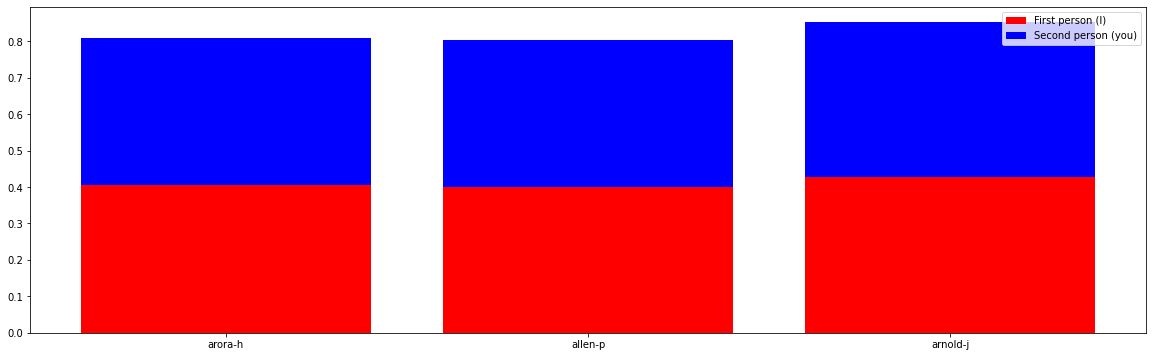

In [88]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(1, 1, figsize=(20, 6))
figure.suptitle = "First and second person pronouns"

total = [first_pers[i] + sec_pers[i] for i in range(len(first_pers))]
x = names
y = [first_pers[i]/total[i] for i in range(len(first_pers))]
z = [sec_pers[i]/total[i] for i in range(len(first_pers))]

ax.bar(x, y, color = "r", label = "First person (I)")
ax.bar(x, z, color = "b", label = "Second person (you)", bottom = z)
ax.legend()

plt.show()